Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Dataset Load

In [ ]:
data = pd.read_csv('football_goal_scorers.csv')

numeric_data = data.select_dtypes(include=['number'])

data['Height'] = data['Height'].str.replace("'", '.').str.replace('"', '').astype(float)

One hot Encoding

In [ ]:
categorical_cols = ['Player Name', 'Nationality', 'Club', 'Position']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
X = data_encoded.drop('Goals Scored', axis=1)
Y = data_encoded['Goals Scored']
data_encoded

,Goals Scored,Assists,Matches Played,Fouls per Match,Yellow Cards,Red Cards,Minutes Played,Age,Height,Total Shots,...,"Club_Whitney, Hanson and Dixon",Club_Williams Ltd,Club_Wilson-Clark,Club_Wood Group,"Club_Wood, Davis and Macias","Club_Wright, Wright and Deleon",Club_Yoder-Vaughn,Club_Young-White,Position_Forward,Position_Midfielder
0,33,14,33,3.14,7,1,2712,26,6.9,62,...,False,False,False,False,False,False,False,False,True,False
1,10,9,13,3.02,3,3,876,35,6.2,89,...,False,False,False,False,False,False,False,False,False,False
2,18,19,11,0.64,15,2,2115,33,6.0,76,...,False,False,False,False,False,False,False,False,False,True
3,8,20,19,2.25,11,0,1176,23,6.4,13,...,False,False,False,False,False,False,False,False,False,True
4,16,13,16,0.94,7,1,844,21,5.1,32,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,8,12,0.10,4,1,354,22,5.1,40,...,False,False,False,False,False,False,False,False,False,True
96,17,0,29,1.59,3,3,1394,24,5.8,55,...,False,False,False,False,False,False,False,False,False,True
97,12,8,38,3.11,3,0,2129,35,5.8,49,...,False,False,False,False,False,False,False,False,False,False
98,26,17,28,1.29,0,1,1260,19,6.9,98,...,False,False,False,False,False,False,False,False,False,True


Feature Standardization, fitting and explained variance

In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA(n_components= 15)
pca.fit(X_standardized)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.01602265 0.01552062 0.01499048 0.0144205  0.01417521 0.01388356
 0.01342637 0.01326799 0.01303998 0.01289375 0.01286582 0.01250018
 0.01232306 0.01227062 0.01195411]


Data Transformation

In [ ]:
n_components_to_retain = 10
X_reduced = pca.transform(X_standardized)[:, :n_components_to_retain]

Plotting

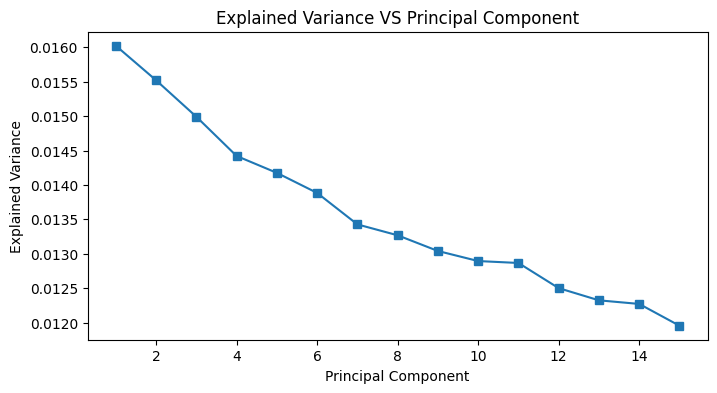

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='s')
plt.title('Explained Variance VS Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

Train & Test split & MSE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_test = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error with Reduced Features:", mse)

Mean Squared Error with Reduced Features: 132.693635


Actual vs Predicted Datasets

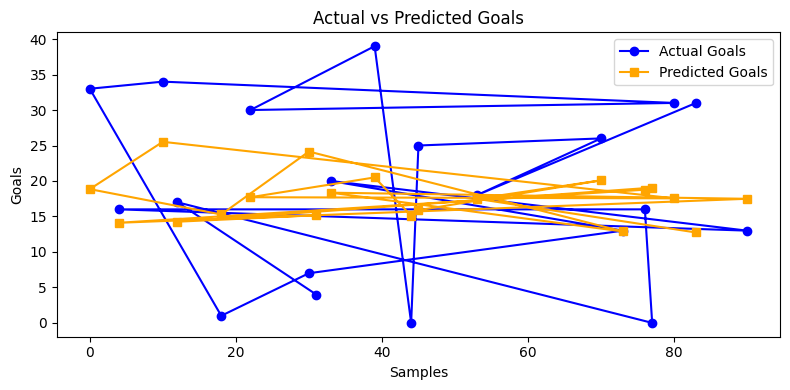

In [ ]:
comparison = pd.DataFrame({'Actual Goals': y_test, 'Predicted Goals': y_pred_test})

plt.figure(figsize=(8, 4))
plt.title("Actual vs Predicted Goals")
plt.plot(comparison.index, comparison['Actual Goals'], label='Actual Goals', linestyle='-', marker='o', color='blue')
plt.plot(comparison.index, comparison['Predicted Goals'], label='Predicted Goals', linestyle='-', marker='s', color='orange')
plt.xlabel("Samples")
plt.ylabel("Goals")
plt.legend()
plt.tight_layout()
plt.show()
